# Energie et environment en Belgique

Le dataset est tiré d'un site web gouvernemental:: http://ibsa.brussels/themes/environnement-et-energie?set_language=fr#.XHfBHuhKhXw 

Les données rassemblées ici portent sur le climat, la qualité de l’air, la consommation et la qualité de l’eau, les collectes de déchets, les espaces verts, la biodiversité, la consommation énergétique, etc.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

pd.options.display.max_rows = 55
pd.options.display.max_colwidth = 500

In [2]:
link1 = '12.1_environnement_energie_environnement_territoire_20180220.xlsx'
link2 = '12.2_environnement_energie_environnement_societe_20180829.xlsx'
link3 = '12.3_environnement_energie_energie_20180829.xlsx'

## Qualité de l'air en Bruxelles-Capitale 2005-2017

- Unités : microgrammes par mètre cube, heures\nÉchelle géographique : station de mesure\nSource : Bruxelles Environnement
- : = Non disponible (mesures non effectuées ou non fiables)
- x : Non existant (nouvelle station de mesure en 2013)
- c : Confidentiel (non communiqué)
- a1 : Valeur limite de 40 µg/m3 en tant que concentration moyenne annuelle à ne pas dépasser (à partir de 2010)
- a2 : Valeur limite de 200 µg/m3 en tant que valeur horaire, à ne pas dépasser plus de 18 fois par an (à partir de 2010)

#### Dataframes

- 1 concentrations en dioxyde d'azote (NO2)
- 2 concentrations en ozone (O3) 
- 3 concentrations en particules en suspension de diamètre inférieur à 10 µm 
- 4 concentrations en particules en suspension de diamètre inférieur à 2,5 µm 

In [20]:
xl = pd.ExcelFile(link1)
#print(xl.sheet_names)

df1 = xl.parse(sheet_name= '12.1.1.2', header=1) #NO2
df2 = xl.parse(sheet_name= '12.1.1.3', header=1) #O3
df3 = xl.parse(sheet_name= '12.1.1.4', header=1) #particles <10µm 
df4 = xl.parse(sheet_name= '12.1.1.5', header=1) #particles <2,5µm 


In [4]:
df1.head()

,Année,Molenbeek (R001),Ixelles (R002),Ste-Catherine (B004),Eastman-Belliard (B005),Parlement européen (B006),Belliard Remard (B008),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1),Forest (E013)
Concentration moyenne annuelle (µg/m3),2005.0,47.0,58.0,43,40,38,:x,32.0,27.0,46.0,32,44.0,34
Part des jours > 40 µg/m3 (%)a1,2005.0,63.3,81.1,47.4,44.7,40.5,:x,24.1,15.1,61.1,27.9,49.0,29.9
Nombre d'heures > 200 µg/m3 (heures)a2,2005.0,0.0,0.0,1,0,0,:x,0.0,0.0,0.0,0,0.0,0
Concentration moyenne annuelle (µg/m3),2006.0,47.0,54.0,:,39,38,:x,29.0,30.0,45.0,31,46.0,32
Part des jours > 40 µg/m3 (%)a1,2006.0,58.6,77.8,:,41.9,38.1,:x,18.4,17.5,53.7,23.3,56.4,20.3


In [21]:
df1 = df1.reset_index()

In [22]:
df1 = df1.iloc[:39]
no2 = df1.T


no2.columns= no2.iloc[0]

In [7]:
no2.columns.unique()

Index(['Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2'],
      dtype='object', name='index')

In [8]:
no2.columns= no2.iloc[0]

In [9]:
 no2.reset_index()

index,index,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,...,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2
0,index,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,...,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2,Concentration moyenne annuelle (µg/m3),Part des jours > 40 µg/m3 (%)a1,Nombre d'heures > 200 µg/m3 (heures)a2
1,Année,2005,2005,2005,2006,2006,2006,2007,2007,2007,...,2014,2015,2015,2015,2016,2016,2016,2017,2017,2017
2,Molenbeek (R001),47,63.3,0,47,58.6,0,46,57.5342,1,...,2,35,33,1,38,38,0,33,28,0
3,Ixelles\n(R002),58,81.1,0,54,77.8,1,54,74.5205,8,...,1,45,59,0,48,65,0,49,67,0
4,Ste-Catherine (B004),43,47.4,1,:,:,:,:,:,:,...,1,31,22,0,33,28,0,35,32,0
5,Eastman-Belliard (B005),40,44.7,0,39,41.9,0,43,47.1233,3,...,:,:,:,:,:,:,:,:,:,:
6,Parlement européen (B006),38,40.5,0,38,38.1,0,40,41.0959,0,...,0,31,24,0,:,:,:,:,:,:
7,Belliard Remard (B008),:x,:x,:x,:x,:x,:x,:x,:x,:x,...,3,62,78,9,:c,:c,:c,:c,:c,:c
8,Berchem-Ste-Agathe (B011),32,24.1,0,29,18.4,0,31,25.4795,1,...,0,22,10,0,22,10,0,23,10,0
9,Uccle\n(R012),27,15.1,0,30,17.5,0,29,21.3699,0,...,0,22,8,0,21,7,0,20,6,0


In [10]:
no2.columns

Index(['Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentration moyenne annuelle (µg/m3)',
       'Part des jours > 40 µg/m3 (%)a1',
       'Nombre d'heures > 200 µg/m3 (heures)a2',
       'Concentratio

encore

In [11]:
# df1.rename(columns={'index':'concentration'}, inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 14 columns):
concentration                39 non-null object
Année                        39 non-null float64
Molenbeek (R001)             39 non-null float64
Ixelles
(R002)               39 non-null float64
Ste-Catherine (B004)         39 non-null object
Eastman-Belliard (B005)      39 non-null object
Parlement européen (B006)    39 non-null object
Belliard Remard (B008)       39 non-null object
Berchem-Ste-Agathe (B011)    39 non-null float64
Uccle
(R012)                 39 non-null float64
Haren
(N043)                 39 non-null float64
Parc Meudon (MEU1)           39 non-null object
Woluwe 
St-Lambert (WOL1)    39 non-null float64
Forest
(E013)                39 non-null object
dtypes: float64(7), object(7)
memory usage: 4.3+ KB


In [13]:
doing = df1.set_index('Année')

doing.columns

Index(['concentration', 'Molenbeek (R001)', 'Ixelles\n(R002)',
       'Ste-Catherine (B004)', 'Eastman-Belliard (B005)',
       'Parlement européen (B006)', 'Belliard Remard (B008)',
       'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)', 'Haren\n(N043)',
       'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)', 'Forest\n(E013)'],
      dtype='object')

In [14]:
decir = df1[df1['concentration'] == 'Concentration moyenne annuelle (µg/m3)']

decir.shape

(13, 14)

In [15]:
decir.columns

Index(['concentration', 'Année', 'Molenbeek (R001)', 'Ixelles\n(R002)',
       'Ste-Catherine (B004)', 'Eastman-Belliard (B005)',
       'Parlement européen (B006)', 'Belliard Remard (B008)',
       'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)', 'Haren\n(N043)',
       'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)', 'Forest\n(E013)'],
      dtype='object')

#### On doit nettoyer les valeurs: 

: = Non disponible (mesures non effectuées ou non fiables)
x : Non existant (nouvelle station de mesure en 2013)
c : Confidentiel (non communiqué)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

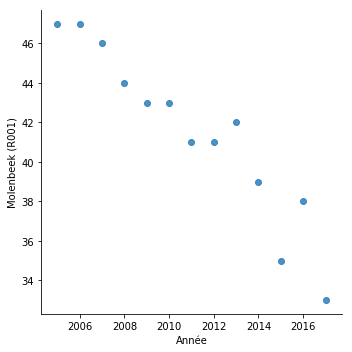

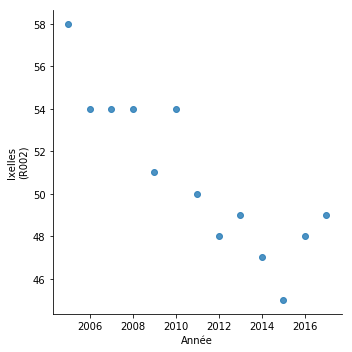

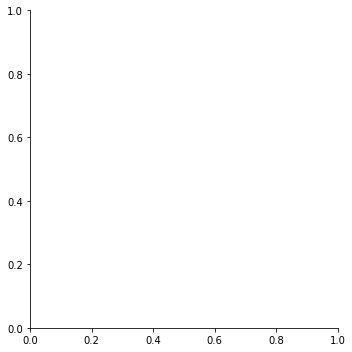

In [16]:
 list = ['Molenbeek (R001)', 'Ixelles\n(R002)',
       'Ste-Catherine (B004)', 'Eastman-Belliard (B005)',
       'Parlement européen (B006)', 'Belliard Remard (B008)',
       'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)', 'Haren\n(N043)',
       'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)', 'Forest\n(E013)']

for y in list: 
    sns.lmplot(data=decir, x="Année", y=y, fit_reg=False)

In [18]:
data = df1.melt(id_vars=['index', 'Année'], value_vars=df1.columns[2:], var_name='location', value_name='concentration').pivot_table(index=['location', 'Année'], columns=['index'], aggfunc=lambda x:x)
#data.columns = data.columns.droplevel()
#data = data.reset_index()
data

""


,concentration,Année,Molenbeek (R001),Ixelles (R002),Ste-Catherine (B004),Eastman-Belliard (B005),Parlement européen (B006),Belliard Remard (B008),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1),Forest (E013)
0,Concentration moyenne annuelle (µg/m3),2005.0,47.000000,58.000000,43,40,38,:x,32.000000,27.000000,46.000000,32,44.000000,34
1,Part des jours > 40 µg/m3 (%)a1,2005.0,63.300000,81.100000,47.4,44.7,40.5,:x,24.100000,15.100000,61.100000,27.9,49.000000,29.9
2,Nombre d'heures > 200 µg/m3 (heures)a2,2005.0,0.000000,0.000000,1,0,0,:x,0.000000,0.000000,0.000000,0,0.000000,0
3,Concentration moyenne annuelle (µg/m3),2006.0,47.000000,54.000000,:,39,38,:x,29.000000,30.000000,45.000000,31,46.000000,32
4,Part des jours > 40 µg/m3 (%)a1,2006.0,58.600000,77.800000,:,41.9,38.1,:x,18.400000,17.500000,53.700000,23.3,56.400000,20.3
5,Nombre d'heures > 200 µg/m3 (heures)a2,2006.0,0.000000,1.000000,:,0,0,:x,0.000000,0.000000,0.000000,0,2.000000,0
6,Concentration moyenne annuelle (µg/m3),2007.0,46.000000,54.000000,:,43,40,:x,31.000000,29.000000,45.000000,32,46.000000,29
7,Part des jours > 40 µg/m3 (%)a1,2007.0,57.534247,74.520548,:,47.1233,41.0959,:x,25.479452,21.369863,50.684931,21.3699,53.972603,13.4
8,Nombre d'heures > 200 µg/m3 (heures)a2,2007.0,1.000000,8.000000,:,3,0,:x,1.000000,0.000000,1.000000,1,7.000000,0
9,Concentration moyenne annuelle (µg/m3),2008.0,44.000000,54.000000,41,37,38,:x,28.000000,27.000000,46.000000,35,42.000000,:
